In [1]:
import pandas as pd
from glob import glob

#### Task 1: Merge 12 months of sales data into a single csv file

In [2]:
stock_files = sorted(glob('Sales_Data/Sales_*_2019.csv'))
stock_files

['Sales_Data/Sales_April_2019.csv',
 'Sales_Data/Sales_August_2019.csv',
 'Sales_Data/Sales_December_2019.csv',
 'Sales_Data/Sales_February_2019.csv',
 'Sales_Data/Sales_January_2019.csv',
 'Sales_Data/Sales_July_2019.csv',
 'Sales_Data/Sales_June_2019.csv',
 'Sales_Data/Sales_March_2019.csv',
 'Sales_Data/Sales_May_2019.csv',
 'Sales_Data/Sales_November_2019.csv',
 'Sales_Data/Sales_October_2019.csv',
 'Sales_Data/Sales_September_2019.csv']

In [3]:
 df = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in stock_files), ignore_index = True)

In [4]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,filename
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_Data/Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_Data/Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_Data/Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_Data/Sales_April_2019.csv


#### Task 2: What was the best month for sales? How much was earned that month?

Convert all df column name to lowercase and replace white sapce with underscore so they all follow the same pattern and remove cloumns not required for analysis eg - filename

Create new column for month to be able to group data by month & drop rows with NAN values

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
del df['filename']
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [6]:
df['month'] = df['order_date'].str[0:2]
df = df.dropna()
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month


The above cell shows there are no more null values

#### Task 3. Drop row with 'Or' in month column

In [8]:
df = df[df['order_date'].str[0:2] != 'Or']
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
df['month'] = df['month'].astype('int32')

In [10]:
df['month'].dtype

dtype('int32')

#### Task 4. Create new column for sales value = quantity_ordered * price_each

In [11]:
df['sales'] = df['quantity_ordered'].astype('float32') * df['price_each'].astype('float32')
df['sales'] = df['sales'].apply(lambda x: round(x, 3))
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 5. What was the best month for sales? How much was earned that month?

In [12]:
sales_df = df.groupby(['month']).sum()['sales']
sales_df

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

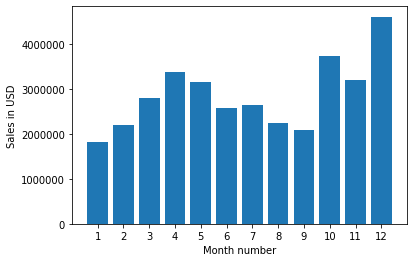

In [13]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, sales_df)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()




### From the above analysis we can conclude that December was the best month for sales with a revenue of 4,613,443 USD

#### Task 6: What city had the highest number of sales?

Create a new column with city names so we can group by it to get result

In [14]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['purchase_address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [15]:
city_sales_df = df.groupby(['city']).sum()['sales']
city_sales_df

city
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: sales, dtype: float64

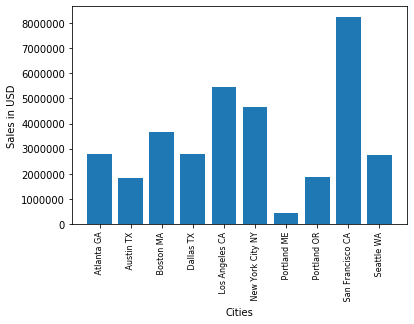

In [16]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('city')]
plt.bar(cities, city_sales_df)
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

San Francisco has the highest number of sales 8.2 million USD

#### Task 7: What time should we display advertisements to maximize likelihood of customer's buying product? 

In [17]:
df['order_date'] =  pd.to_datetime(df['order_date'])
df['hour'] = df['order_date'].dt.hour
df.groupby(['hour']).count()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


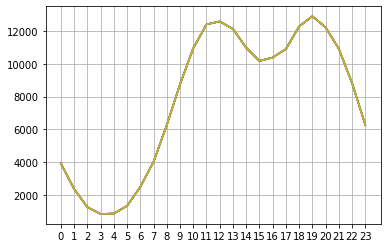

In [18]:
hours = [hour for hour, df in df.groupby('hour')]
plt.plot(hours, df.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

The above chart shows we have two peaks in our data set. According to these peaks the best time to advertise will be around 11am to noon and also in the evening around 6pm to 7pm.

#### Task 8:. What products are most often sold together?

In [19]:
group_df = df[df['order_id'].duplicated(keep=False)]
group_df['grouped'] = group_df.groupby('order_id')['product'].transform(lambda x: ','.join(x))

df2 = group_df[['order_id', 'grouped']].drop_duplicates()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df2.head()

,order_id,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
freq = {}
for item in df2['grouped']:
    if item in freq:
        freq[item] += 1
    else:
        freq[item] = 1
freq

{'Google Phone,Wired Headphones': 303,
 'Google Phone,USB-C Charging Cable': 856,
 'Bose SoundSport Headphones,Bose SoundSport Headphones': 27,
 'AAA Batteries (4-pack),Google Phone': 11,
 'Lightning Charging Cable,USB-C Charging Cable': 55,
 'Apple Airpods Headphones,ThinkPad Laptop': 9,
 'Bose SoundSport Headphones,AAA Batteries (4-pack)': 37,
 '34in Ultrawide Monitor,Google Phone': 2,
 'iPhone,Lightning Charging Cable': 882,
 'Google Phone,Bose SoundSport Headphones,Wired Headphones': 21,
 'AAA Batteries (4-pack),27in FHD Monitor': 22,
 'USB-C Charging Cable,AAA Batteries (4-pack)': 42,
 'iPhone,Wired Headphones': 361,
 'iPhone,27in 4K Gaming Monitor': 5,
 'ThinkPad Laptop,AAA Batteries (4-pack)': 16,
 'iPhone,Apple Airpods Headphones,AAA Batteries (4-pack)': 3,
 'Wired Headphones,Apple Airpods Headphones': 29,
 'Macbook Pro Laptop,ThinkPad Laptop': 3,
 'AA Batteries (4-pack),Flatscreen TV': 13,
 'Vareebadd Phone,USB-C Charging Cable': 312,
 'USB-C Charging Cable,Lightning Charging 

In [22]:
freq_sorted_keys = sorted(freq, key=freq.get, reverse=True)
freq_sorted_keys

['iPhone,Lightning Charging Cable',
 'Google Phone,USB-C Charging Cable',
 'iPhone,Wired Headphones',
 'Vareebadd Phone,USB-C Charging Cable',
 'Google Phone,Wired Headphones',
 'iPhone,Apple Airpods Headphones',
 'Google Phone,Bose SoundSport Headphones',
 'Vareebadd Phone,Wired Headphones',
 'Google Phone,USB-C Charging Cable,Wired Headphones',
 'Vareebadd Phone,Bose SoundSport Headphones',
 'iPhone,Lightning Charging Cable,Wired Headphones',
 'Lightning Charging Cable,USB-C Charging Cable',
 'Lightning Charging Cable,AA Batteries (4-pack)',
 'Lightning Charging Cable,Lightning Charging Cable',
 'AA Batteries (4-pack),Lightning Charging Cable',
 'AAA Batteries (4-pack),USB-C Charging Cable',
 'AA Batteries (4-pack),AAA Batteries (4-pack)',
 'AAA Batteries (4-pack),AAA Batteries (4-pack)',
 'USB-C Charging Cable,USB-C Charging Cable',
 'Apple Airpods Headphones,AAA Batteries (4-pack)',
 'AA Batteries (4-pack),Wired Headphones',
 'AAA Batteries (4-pack),Lightning Charging Cable',
 'AAA

The above products are most often bought together in that particular order

#### Task 9: What product sold the most? Why do you think it did the most?

In [23]:
count_df = df.groupby(['product']).count()['quantity_ordered']
count_df

product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: quantity_ordered, dtype: int64

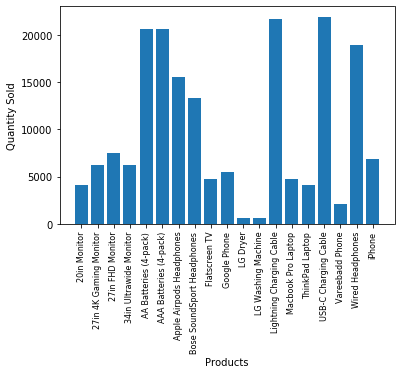

In [24]:
products = [products for products, count_df in count_df.groupby('product')]
plt.bar(products, count_df)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Sold')
plt.xlabel('Products')
plt.show()